In [64]:
import cv2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [65]:
# Load the image
image = cv2.imread('red_line_image.jpg')

In [66]:
# Convert image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


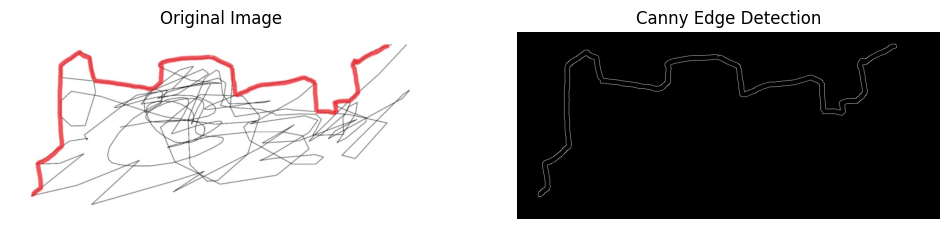

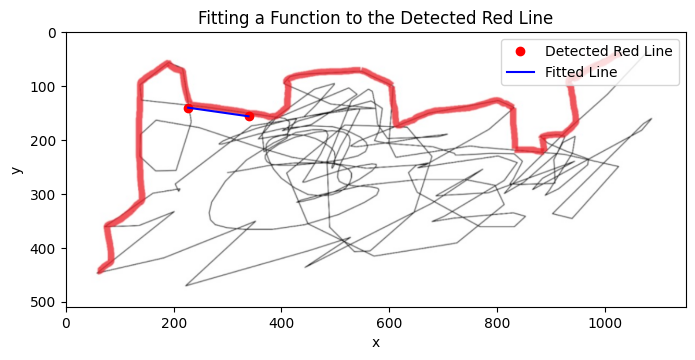

In [67]:
## Not completely Working :(
# # Preprocess the image
# # Convert image to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Threshold the image to obtain a binary image
# _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

# # Find contours in the binary image
# contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Extract the red line based on color
# lower_red = np.array([0, 0, 100])  # Adjust these values to match the red color range
# upper_red = np.array([100, 100, 255])
# red_mask = cv2.inRange(image, lower_red, upper_red)

# # Combine the red mask with the binary image to isolate the red line
# masked_image = cv2.bitwise_and(binary_image, binary_image, mask=red_mask)

# # Find contours in the masked image
# contours, _ = cv2.findContours(masked_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Extract the largest contour (assuming it corresponds to the red line)
# largest_contour = max(contours, key=cv2.contourArea)




# # It is detecting the black lines, too :(
# # Preprocess the image
# # Convert image to grayscale
# gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # Apply Gaussian blur to reduce noise
# blur_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# # Detect edges using Canny edge detection
# edges = cv2.Canny(blur_image, 50, 150)

# # Find lines using Hough line transformation
# lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi / 180, threshold=50, minLineLength=50, maxLineGap=5)


# # Incomplete Detection and wrong detection in the new picture
# # Define lower and upper thresholds for red color in HSV
# lower_red = np.array([300, 60, 90])  # Adjust these values as needed
# upper_red = np.array([360, 100, 100])  # Adjust these values as needed

# # Create a mask for red pixels using the thresholds
# red_mask = cv2.inRange(hsv_image, lower_red, upper_red)

# # Find contours in the red mask
# contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Check if contours were found
# if contours:
#     # Extract the largest contour (assuming it corresponds to the red line)
#     largest_contour = max(contours, key=cv2.contourArea)
# else:
#     print("No red line detected.")



# Define lower and upper thresholds for red color in HSV
lower_red1 = np.array([0, 50, 50])
upper_red1 = np.array([10, 255, 255])
lower_red2 = np.array([170, 50, 50])
upper_red2 = np.array([180, 255, 255])

# Create masks for red pixels using the thresholds
red_mask1 = cv2.inRange(hsv_image, lower_red1, upper_red1)
red_mask2 = cv2.inRange(hsv_image, lower_red2, upper_red2)
red_mask = cv2.bitwise_or(red_mask1, red_mask2)

# Apply Canny edge detection on the red mask
edges = cv2.Canny(red_mask, 50, 150, apertureSize=3)

# Apply Hough line transformation to detect lines
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength=100, maxLineGap=10)

# Check if lines were detected
if lines is not None:
    # Extract the coordinates of the detected lines
    x_coords = []
    y_coords = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        x_coords.extend([x1, x2])
        y_coords.extend([y1, y2])

    # Define the function to fit (e.g., a straight line equation)
    def line_func(x, m, b):
        return m * x + b

    # Fit the line function to the coordinates
    popt, _ = curve_fit(line_func, x_coords, y_coords)

    # Extract the fitted parameters
    m, b = popt

    # Generate x values for plotting the fitted line
    x_plot = np.linspace(min(x_coords), max(x_coords), 100)

    # Evaluate the fitted function for the plotted x values
    y_plot = line_func(x_plot, m, b)

    # Plot the original image, edges, and the fitted line
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Canny Edge Detection')
    plt.axis('off')

    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.plot(x_coords, y_coords, 'ro', label='Detected Red Line')
    plt.plot(x_plot, y_plot, 'b-', label='Fitted Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Fitting a Function to the Detected Red Line')
    plt.legend()
    plt.show()
else:
    print("No red line detected.")


In [56]:
# Extract the coordinates of the red line
x_coords = largest_contour[:, 0, 0]
y_coords = largest_contour[:, 0, 1]

# # Extract the coordinates of the red line
# x_coords = []
# y_coords = []
# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     x_coords.extend([x1, x2])
#     y_coords.extend([y1, y2])

In [57]:
# Define the function to fit (e.g., a straight line equation)
def line_func(x, m, b):
    return m * x + b

In [58]:
# Fit the line function to the coordinates
popt, _ = curve_fit(line_func, x_coords, y_coords)

In [59]:
# Extract the fitted parameters
m, b = popt

In [60]:
# Generate x values for plotting the fitted line
x_plot = np.linspace(min(x_coords), max(x_coords), 100)

In [61]:
# Evaluate the fitted function for the plotted x values
y_plot = line_func(x_plot, m, b)

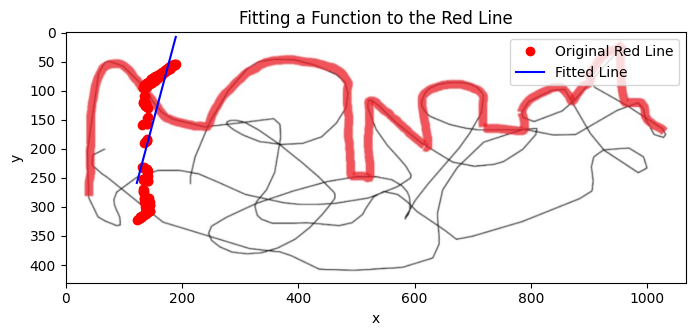

In [62]:
# Plot the original red line and the fitted line
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.plot(x_coords, y_coords, 'ro', label='Original Red Line')
plt.plot(x_plot, y_plot, 'b-', label='Fitted Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting a Function to the Red Line')
plt.legend()
plt.show()